In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
input_data = pd.read_csv("deepsolar_tract.csv", encoding="latin-1")

In [3]:
input_data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
input_data.head()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,336,157,4548,26,3569,0.3490,200,448,98,1720,2527,10,51,0,147.73120,26999.0,6577,44.52005,85,1911,28,19,16,0,6,88,6420,mn,154.37190,136,6.640769,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,0.002858,0.97

In [5]:
# used to drop any rows that contain any null values from the list of demographic factors I intend to take a deeper look at
input_data[['solar_system_count', 'average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].dropna()

,solar_system_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
0,0.0,70352.789869,28,19,16,6420
1,21.0,61727.085202,188,205,23,7405
2,3.0,71496.886583,0,0,2,6939
3,0.0,86840.152755,171,69,26,5693
4,5.0,89135.315597,34,91,0,5017
...,...,...,...,...,...,...
72532,1.0,90163.611860,210,36,0,6078
72533,0.0,45124.153006,7,90,175,2384
72534,1.0,60878.458738,54,93,380,4064
72535,0.0,56817.996870,10,0,115,1669


### get the top five states in terms of solar panel growth which are California, Florida, Arizona, New York, and New Jersey

In [6]:
top_five = input_data[['state', 'solar_system_count']].groupby('state', as_index=False).sum()
top_five.nlargest(5, ['solar_system_count'])

,state,solar_system_count
3,ca,693250.0
8,fl,155383.0
2,az,101985.0
32,ny,60514.0
29,nj,59735.0


In [23]:
ca_df = input_data[input_data['state']=='ca'][['state','county','solar_system_count','average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
fl_df = input_data[input_data['state']=='fl'][['county','solar_system_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
az_df = input_data[input_data['state']=='az'][['county','solar_system_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
ny_df = input_data[input_data['state']=='ny'][['county','solar_system_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
nj_df = input_data[input_data['state']=='nj'][['county','solar_system_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

### correlation between solar panel tile count and demographic factors such as average household income and racial ethnicity across top five states in solar panel growth

In [24]:
ca_df.append(fl_df).append(az_df).append(az_df).append(ny_df).append(nj_df).corr()

,solar_system_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
solar_system_count,1.000000,0.242398,0.370490,-0.113367,-0.091665,0.265919
average_household_income,0.242398,1.000000,0.600640,-0.045996,-0.211064,0.037500
race_asian,0.370490,0.600640,1.000000,0.054030,-0.108679,-0.167314
race_black_africa,-0.113367,-0.045996,0.054030,1.000000,-0.175557,-0.073283
race_indian_alaska,-0.091665,-0.211064,-0.108679,-0.175557,1.000000,-0.313967
race_white,0.265919,0.037500,-0.167314,-0.073283,-0.313967,1.000000


In [25]:
ca_df["color"] = "dodgerblue"
fl_df["color"] = "orange"
az_df["color"] = "red"
ny_df["color"] = "forestgreen"
nj_df["color"] = "blueviolet"

In [26]:
# these numbers represent the average of each of the state's counties
top_five_states = ca_df.append(fl_df).append(az_df).append(az_df).append(ny_df).append(nj_df)
top_five_states

,state,county,solar_system_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,ca,Alameda County,74.634349,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,ca,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,ca,Amador County,29.777778,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,ca,Butte County,60.019608,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,ca,Calaveras County,33.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
16,nj,Salem County,10.200000,74085.696960,25.520000,365.320000,4.440000,2090.400000,blueviolet
17,nj,Somerset County,41.176471,133432.493983,781.352941,442.205882,6.470588,3317.779412,blueviolet
18,nj,Sussex County,7.731707,102580.694201,65.804878,75.170732,1.951220,3322.121951,blueviolet
19,nj,Union County,21.138889,95087.279154,245.027778,1082.611111,9.157407,2940.194444,blueviolet


# kmeans clustering on top 5 states (CA, AZ, FL, NY, NJ) of solar panel growth (average household income vs tile count)

### preprocessing
### (used to get the actual class labels which will be used to compare original groupings of data vs the predicted groupings formed by k-means)

In [27]:
label_encoder = preprocessing.LabelEncoder()

In [28]:
top_five_states['state'] = label_encoder.fit_transform(top_five_states['state'])

In [33]:
top_five_states

,state,county,solar_system_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,1,Alameda County,74.634349,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,1,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,1,Amador County,29.777778,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,1,Butte County,60.019608,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,1,Calaveras County,33.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
16,3,Salem County,10.200000,74085.696960,25.520000,365.320000,4.440000,2090.400000,blueviolet
17,3,Somerset County,41.176471,133432.493983,781.352941,442.205882,6.470588,3317.779412,blueviolet
18,3,Sussex County,7.731707,102580.694201,65.804878,75.170732,1.951220,3322.121951,blueviolet
19,3,Union County,21.138889,95087.279154,245.027778,1082.611111,9.157407,2940.194444,blueviolet


In [34]:
X = top_five_states[['solar_system_count','average_household_income']]

In [35]:
X = X.to_numpy()
X

array([[7.46343490e+01, 1.01764702e+05],
       [0.00000000e+00, 6.29586592e+04],
       [2.97777778e+01, 7.22581483e+04],
       [6.00196078e+01, 5.93402224e+04],
       [3.30000000e+01, 7.54448162e+04],
       [6.38000000e+01, 6.42253665e+04],
       [1.76350962e+02, 1.08654144e+05],
       [3.12500000e+00, 5.23363356e+04],
       [1.09186047e+02, 9.13372596e+04],
       [1.40301508e+02, 6.25318816e+04],
       [1.04333333e+02, 6.35026309e+04],
       [2.25161290e+01, 5.63239930e+04],
       [6.59354839e+01, 5.55888699e+04],
       [1.71666667e+01, 6.67741439e+04],
       [1.77337748e+02, 6.40004806e+04],
       [1.57148148e+02, 6.19008663e+04],
       [3.26000000e+01, 4.78801966e+04],
       [1.33333333e+00, 6.11366815e+04],
       [4.36611253e+01, 7.95241975e+04],
       [1.26565217e+02, 5.94309470e+04],
       [8.28035714e+01, 1.47071451e+05],
       [1.50000000e+00, 6.72175495e+04],
       [1.52857143e+01, 6.03559255e+04],
       [1.11816327e+02, 5.72499223e+04],
       [3.750000

In [36]:
actual_labels = np.array(top_five_states['state'])
actual_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [37]:
kmeans = KMeans(n_clusters=5, random_state=21)

In [38]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [39]:
centers = kmeans.cluster_centers_
print(centers)

[[3.87010418e+01 7.53859564e+04]
 [2.04419977e+01 5.03614894e+04]
 [3.98676369e+01 1.28655932e+05]
 [6.38637322e+01 9.45081557e+04]
 [3.16911449e+01 6.18420886e+04]]


In [40]:
new_labels = kmeans.labels_
new_labels

array([3, 4, 0, 4, 0, 4, 3, 1, 3, 4, 4, 4, 1, 4, 4, 4, 1, 4, 0, 4, 2, 4,
       4, 4, 1, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 4, 3, 2, 4, 0, 2, 3, 2, 3,
       4, 4, 1, 0, 3, 4, 0, 1, 1, 1, 4, 3, 0, 1, 4, 4, 4, 1, 4, 0, 1, 4,
       1, 4, 3, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0,
       1, 4, 4, 4, 0, 4, 1, 1, 1, 4, 1, 3, 0, 3, 0, 0, 1, 4, 4, 0, 4, 4,
       1, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 1,
       0, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 0, 1, 1, 4, 4, 1, 4,
       1, 0, 1, 1, 4, 1, 4, 1, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 0, 4, 1, 2, 2, 4, 4, 4, 0, 3, 4, 4, 4, 2, 0, 0, 3,
       3, 3, 0, 4, 4, 4, 4, 4, 2, 4, 0, 0, 0, 0, 4, 4, 2, 4, 4, 0, 2, 3,
       0, 0, 4, 0, 3, 0, 2, 3, 3, 2, 2, 0, 0, 0, 2, 3, 3, 3], dtype=int32)

### Graphs below show that on average, people with lower household income are more willing to use solar panels as oppose to people with higher household income

Text(0, 0.5, 'Average solar panel count')

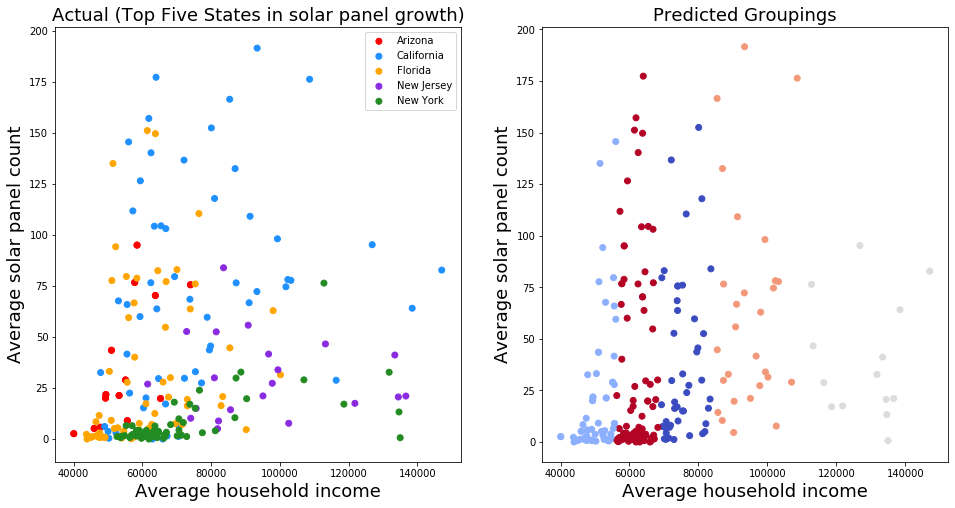

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "New Jersey"
    elif (cls == 4):
        label = "New York"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average household income", fontsize=18)
    axes[0].set_ylabel("Average solar panel count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted Groupings", fontsize=18)
axes[1].set_xlabel("Average household income", fontsize=18)
axes[1].set_ylabel("Average solar panel count", fontsize=18)

# k-means on top 5 states of solar panel growth (race vs tile count)

In [42]:
top_five_states

,state,county,solar_system_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,1,Alameda County,74.634349,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,1,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,1,Amador County,29.777778,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,1,Butte County,60.019608,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,1,Calaveras County,33.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
16,3,Salem County,10.200000,74085.696960,25.520000,365.320000,4.440000,2090.400000,blueviolet
17,3,Somerset County,41.176471,133432.493983,781.352941,442.205882,6.470588,3317.779412,blueviolet
18,3,Sussex County,7.731707,102580.694201,65.804878,75.170732,1.951220,3322.121951,blueviolet
19,3,Union County,21.138889,95087.279154,245.027778,1082.611111,9.157407,2940.194444,blueviolet


In [43]:
# first kmeans on white population
X = top_five_states[['solar_system_count','race_white']]
X = X.to_numpy()
X

array([[7.46343490e+01, 1.96276454e+03],
       [0.00000000e+00, 7.83000000e+02],
       [2.97777778e+01, 3.55622222e+03],
       [6.00196078e+01, 3.63545098e+03],
       [3.30000000e+01, 4.12100000e+03],
       [6.38000000e+01, 3.63760000e+03],
       [1.76350962e+02, 3.18945192e+03],
       [3.12500000e+00, 2.65600000e+03],
       [1.09186047e+02, 3.67193023e+03],
       [1.40301508e+02, 2.86658794e+03],
       [1.04333333e+02, 3.98283333e+03],
       [2.25161290e+01, 3.54261290e+03],
       [6.59354839e+01, 4.07435484e+03],
       [1.71666667e+01, 2.53333333e+03],
       [1.77337748e+02, 4.28266887e+03],
       [1.57148148e+02, 3.82551852e+03],
       [3.26000000e+01, 3.40506667e+03],
       [1.33333333e+00, 2.71611111e+03],
       [4.36611253e+01, 2.27890708e+03],
       [1.26565217e+02, 5.43834783e+03],
       [8.28035714e+01, 3.65925000e+03],
       [1.50000000e+00, 2.59616667e+03],
       [1.52857143e+01, 3.45295238e+03],
       [1.11816327e+02, 3.29451020e+03],
       [3.750000

In [44]:
actual_labels = np.array(top_five_states['state'])

In [45]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [46]:
print(kmeans.cluster_centers_)

[[  34.68292903 3356.82440765]
 [  48.49205759 4994.80775643]
 [  23.1550063  2630.8740856 ]
 [   8.39764446 1401.84615645]
 [  45.94630823 4025.30767017]]


In [47]:
new_labels = kmeans.labels_
new_labels

array([3, 3, 0, 0, 4, 0, 0, 2, 0, 2, 4, 0, 4, 2, 4, 4, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 4, 0, 2, 1, 0, 0, 2, 0, 2, 4, 0, 0, 2, 2, 4, 2, 0, 2, 4,
       0, 2, 2, 2, 4, 4, 0, 1, 2, 1, 4, 4, 0, 0, 0, 1, 0, 1, 4, 0, 4, 4,
       1, 1, 4, 4, 0, 0, 0, 2, 4, 3, 2, 0, 2, 0, 2, 4, 4, 0, 0, 2, 4, 4,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 4, 0, 4, 2, 1, 0, 2, 4, 1, 0, 0, 0,
       0, 0, 1, 4, 4, 1, 1, 1, 1, 0, 4, 0, 1, 4, 2, 3, 0, 0, 2, 0, 2, 3,
       0, 4, 3, 0, 4, 4, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 4, 3, 0, 4, 4, 1,
       2, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 2, 4, 0, 2, 0, 2, 0, 0, 0, 2, 3,
       0, 4, 3, 4, 4, 4, 2, 2, 0, 0, 0, 2, 2, 4, 0, 0, 4, 0, 1, 3, 0, 0,
       0, 4, 2, 4, 0, 0, 4, 0, 4, 2, 1, 0, 0, 0, 0, 4, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 3, 4, 2, 4, 0, 2, 0, 4, 4, 0, 2, 0, 0, 2, 4], dtype=int32)

### As shown in the graph below, on average as the population white people increases so does solar panels 

Text(0, 0.5, 'Average solar panel count')

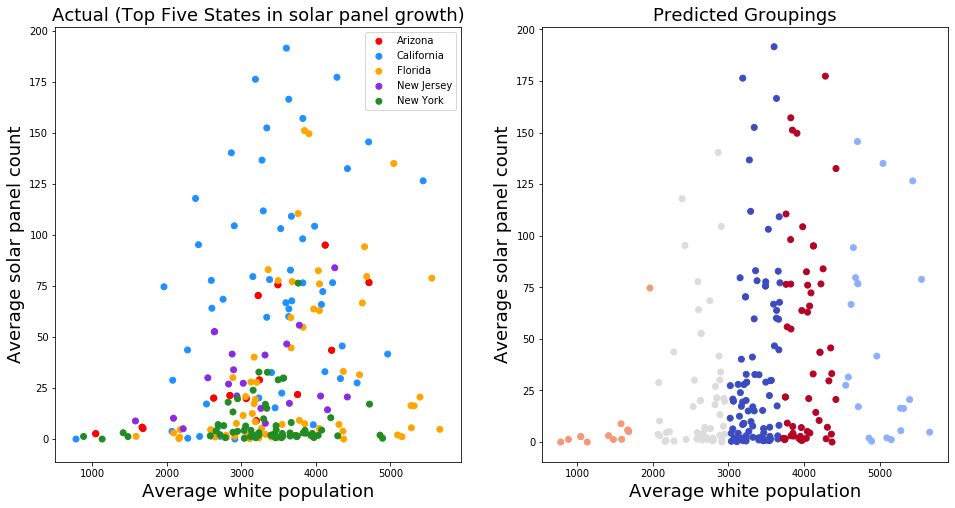

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "New Jersey"
    elif (cls == 4):
        label = "New York"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average white population", fontsize=18)
    axes[0].set_ylabel("Average solar panel count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted Groupings", fontsize=18)
axes[1].set_xlabel("Average white population", fontsize=18)
axes[1].set_ylabel("Average solar panel count", fontsize=18)

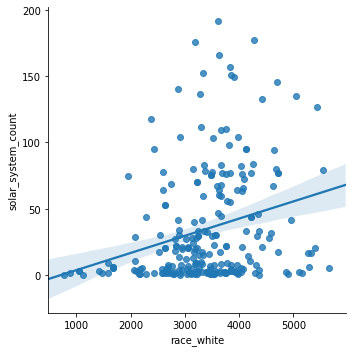

In [49]:
sns.lmplot('race_white', 'solar_system_count', data=top_five_states)

In [50]:
# first kmeans on Asian population
X = top_five_states[['solar_system_count','race_asian']]
X = X.to_numpy()
X

array([[7.46343490e+01, 1.21621884e+03],
       [0.00000000e+00, 1.40000000e+01],
       [2.97777778e+01, 5.97777778e+01],
       [6.00196078e+01, 1.88058824e+02],
       [3.30000000e+01, 4.02000000e+01],
       [6.38000000e+01, 8.38000000e+01],
       [1.76350962e+02, 8.03918269e+02],
       [3.12500000e+00, 7.50000000e+01],
       [1.09186047e+02, 1.67418605e+02],
       [1.40301508e+02, 4.69844221e+02],
       [1.04333333e+02, 1.15833333e+02],
       [2.25161290e+01, 1.14935484e+02],
       [6.59354839e+01, 8.91290323e+01],
       [1.71666667e+01, 4.06666667e+01],
       [1.77337748e+02, 2.61920530e+02],
       [1.57148148e+02, 2.07481481e+02],
       [3.26000000e+01, 5.50666667e+01],
       [1.33333333e+00, 5.47777778e+01],
       [4.36611253e+01, 6.04587383e+02],
       [1.26565217e+02, 1.41391304e+02],
       [8.28035714e+01, 2.62160714e+02],
       [1.50000000e+00, 3.85000000e+01],
       [1.52857143e+01, 8.08095238e+01],
       [1.11816327e+02, 4.06204082e+02],
       [3.750000

In [51]:
actual_labels = np.array(top_five_states['state'])

In [52]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [53]:
new_labels = kmeans.labels_
new_labels

array([3, 0, 0, 4, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 2, 4, 0, 0, 1, 4, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 4, 2, 1, 3, 1, 4, 3, 2, 3, 4,
       4, 0, 0, 1, 4, 2, 1, 0, 0, 4, 0, 2, 1, 2, 2, 0, 0, 0, 4, 4, 0, 4,
       4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2, 4, 4, 0, 4,
       0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 4, 0, 2, 1, 0, 4, 4, 0, 4, 0, 0, 0, 4, 1, 0, 2,
       2, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 4,
       4, 0, 0, 4, 4, 1, 4, 2, 3, 4, 2, 4, 2, 0, 1, 0, 2, 4], dtype=int32)

### Example of what a misleading visualization could be because the average asian population is drastically lower than the average white population; this data may not be as accurate as graphs above

Text(0, 0.5, 'Average solar panel count')

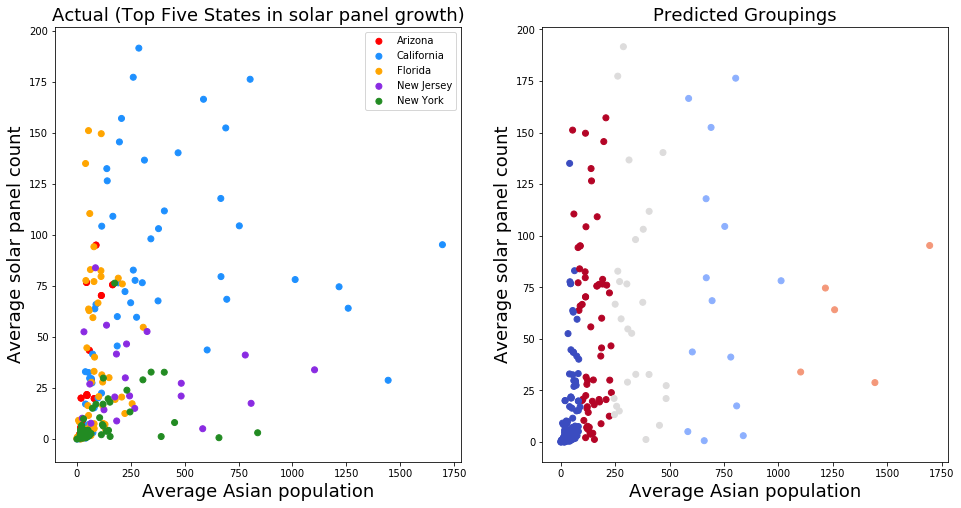

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "New Jersey"
    elif (cls == 4):
        label = "New York"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average Asian population", fontsize=18)
    axes[0].set_ylabel("Average solar panel count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted Groupings", fontsize=18)
axes[1].set_xlabel("Average Asian population", fontsize=18)
axes[1].set_ylabel("Average solar panel count", fontsize=18)